In [222]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

import pandas as pd
import pickle
import os

In [223]:
# loading our dataframes
#we will be using df_m for our sample of math class studetns and df_p for our sameple of portugees class. 

df_m = pd.read_csv('../data/student-mat.csv', delimiter=';')
df_p = pd.read_csv('../data/student-por.csv', delimiter=';')

In [224]:
#dropping outliners
df_m = df_m.drop(df_m[(df_m['G3'] == 0) & (df_m['absences'] == 0)].index)
df_p = df_p.drop(df_p[(df_p['G3'] == 0) & (df_p['absences'] == 0)].index)

In [225]:
# identify what columns of the dataset we can take and include in our linear regression model
df_m.columns

Index(['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime',
       'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc',
       'Walc', 'health', 'absences', 'G1', 'G2', 'G3'],
      dtype='object')

In [226]:
#first let's create a new dataframe with specific columns we want to feed our model 
#for the linear regression model we will be using G3 that represent the final grade of studetns 

new_df_m = df_m[['G1','G2', 'G3', 'romantic', 'sex']]
new_df_p = df_p[['G1','G2','G3', 'romantic', 'sex']]

In [227]:
#transforming the categorical variable column to binomial format (true and false) 
new_df_m = pd.get_dummies(new_df_m, columns=['romantic', 'sex'])
new_df_p = pd.get_dummies(new_df_p, columns=['romantic', 'sex'])

In [228]:
#changes check 
new_df_m.head()

,G1,G2,G3,romantic_no,romantic_yes,sex_F,sex_M
0,5,6,6,True,False,True,False
1,5,5,6,True,False,True,False
2,7,8,10,True,False,True,False
3,15,14,15,False,True,True,False
4,6,10,10,True,False,True,False


In [229]:
#making sure that all columns have approprite format
print(new_df_m.dtypes)
print(new_df_p.dtypes)

G1              int64
G2              int64
G3              int64
romantic_no      bool
romantic_yes     bool
sex_F            bool
sex_M            bool
dtype: object
G1              int64
G2              int64
G3              int64
romantic_no      bool
romantic_yes     bool
sex_F            bool
sex_M            bool
dtype: object


In [230]:
new_df_m.columns

Index(['G1', 'G2', 'G3', 'romantic_no', 'romantic_yes', 'sex_F', 'sex_M'], dtype='object')

In [231]:
#give the value to X and Y. Since we have 2 DF we will use X1 and Y1 for math class related lines and X2, Y2 for Port class
X1 = new_df_m[['G1', 'G2', 'romantic_no', 'romantic_yes', 'sex_F', 'sex_M']]  
y1 = new_df_m['G3']

X2 = new_df_p[['G1', 'G2','romantic_no', 'romantic_yes', 'sex_F', 'sex_M']]  
y2 = new_df_p['G3']


In [232]:
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size=0.2, random_state=42)

X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size=0.2, random_state=42)



In [233]:

model1 = LinearRegression()
model1.fit(X1_train, y1_train)

model2 = LinearRegression()
model2.fit(X2_train, y2_train)

LinearRegression()

In [234]:
y1_pred = model1.predict(X1_test)
y2_pred = model2.predict(X2_test)

In [235]:
mse1 = mean_squared_error(y1_test, y1_pred)
r2_1 = r2_score(y1_test, y1_pred)
print('Mean Squared Error for M class:', mse1)
print('R-squared for M class:', r2_1)

print(" ")
mse2 = mean_squared_error(y2_test, y2_pred)
r2_2 = r2_score(y2_test, y2_pred)
print('Mean Squared Error for P class:', mse2)
print('R-squared for P class:', r2_2)

Mean Squared Error for M class: 0.6888465873714984
R-squared for M class: 0.9284988745382967
 
Mean Squared Error for P class: 0.8733143778705176
R-squared for P class: 0.8934420098596425


In [236]:
import pandas as pd
import numpy as np

import scipy.stats as stats
import statsmodels.api as sm
from statsmodels.formula.api import ols
import matplotlib.pyplot as plt
import seaborn as sns

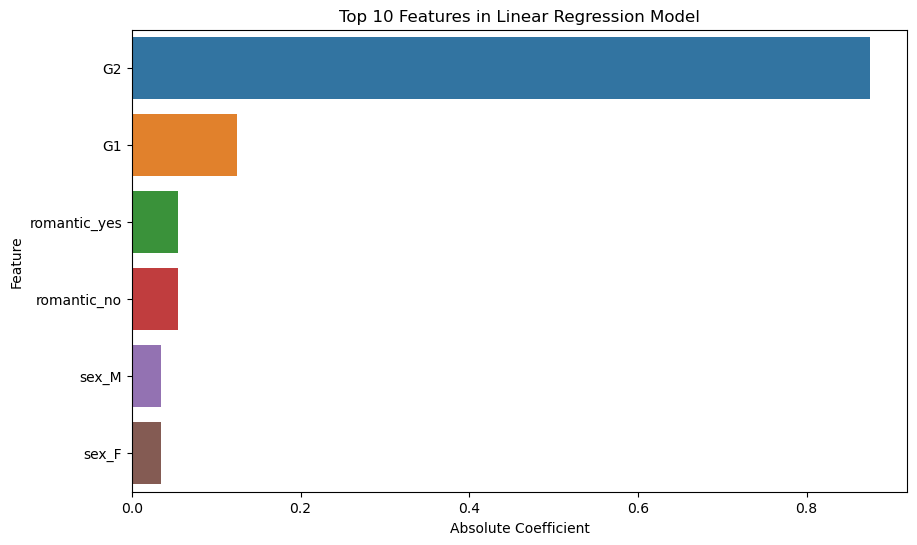

In [237]:
coefficients = model1.coef_

# Create a DataFrame for feature names and their corresponding coefficients
feature_names = 'G1', 'G2', 'romantic_no', 'romantic_yes', 'sex_F', 'sex_M' 
# Feature names after one-hot encoding
coef_df = pd.DataFrame({'Feature': feature_names, 'Coefficient': coefficients})

# Sort and visualize
coef_df['Abs_Coefficient'] = coef_df['Coefficient'].abs()
coef_df = coef_df.sort_values(by='Abs_Coefficient', ascending=False)
plt.figure(figsize=(10, 6))
sns.barplot(data=coef_df.head(10), x='Abs_Coefficient', y='Feature')
plt.title('Top 10 Features in Linear Regression Model')
plt.xlabel('Absolute Coefficient')
plt.ylabel('Feature')
plt.show()